In [11]:
import math
import numpy as np
import pandas as pd
import os
import tarfile
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn as sk
#from matplotlib import rcParams
from IPython.display import Image, display, HTML
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('TkAgg')
%matplotlib inline

# FUNCTIONS

In [33]:
def panderise(outputPath, projectName):
    dataFilename = 'zerodData.csv'
    inputFilename = 'inputs.txt'
    projectPath = os.path.join(outputPath, projectName)
    modelList = [
        filename for filename in os.listdir(projectPath) \
        if filename[:6] == 'pemod_'
        ]
    dataList = []
    inputList = []
    for filename in res32models:
        fullPath = os.path.join(res32_outputPath, filename)
        with tarfile.open(fullPath) as tar:
            inputFile = tar.extractfile(inputFilename)
            inputList.append(json.load(inputFile)['params'])
            dataFile = tar.extractfile(dataFilename)
            data = pd.read_csv(dataFile)
            goodheader = ''.join(list(data.columns.values))[2:].split(' ')
            data.columns = goodheader
            dataList.append(data)
    #         data = dataFile.read()
    outputFrame = pd.concat(dataList, keys = modelList)
    inputFrame = pd.DataFrame(inputList, index = modelList)
    # Because I forgot to sanitise 'f' input:
    inputFrame = inputFrame.replace('max', 1.)
    return inputFrame, outputFrame

In [41]:
def megaplot(inputFrame, outputFrame):
#     res = 32
    maxtime = max(outputFrame['modeltime'])
    rowName = 'Ra'
    rows = sorted(list(set(inputFrame.Ra)))
    cols = ['Nu', 'VRMS', 'avTemp']

    fig, axs = plt.subplots(len(rows), len(cols), sharex=True, figsize = (12, 40))

    for row, val in enumerate(rows):
#         indices = inputFrame.loc[inputFrame[rowName] == val].loc[inputFrame['res'] == res].index
        indices = inputFrame.loc[inputFrame[rowName] == val].index
        for index in indices:
            frame = outputFrame.loc[outputFrame['modeltime'] < maxtime].loc[index]
            for col, val in enumerate(cols):
                ignoreme = axs[row][col].plot(frame.modeltime, frame[val])

    for index, val in enumerate(cols):
        axs[0][index].set_title(val)
    for index, val in enumerate(rows):
        axs[index][0].set_ylabel(val)
    axs[len(rows) - 1][0].set_xlabel('Dimensionless time')

    legendtext = list(sorted(['f = ' + str(val) for val in list(inputFrame.loc[indices].f)]))
    legend = plt.figlegend(
        legendtext,
        loc='upper center',
        shadow = True,
        mode = 'expand',
        )
    fig.subplots_adjust(hspace=0)
    # fig.suptitle('Isoviscous suite: res = ' + str(res))
    fig.show()

# WORK #

In [ ]:
outputPath = '../../data/isobenchJune'

In [ ]:
# inputFrame, outputFrame = panderise(outputPath, 'res32')

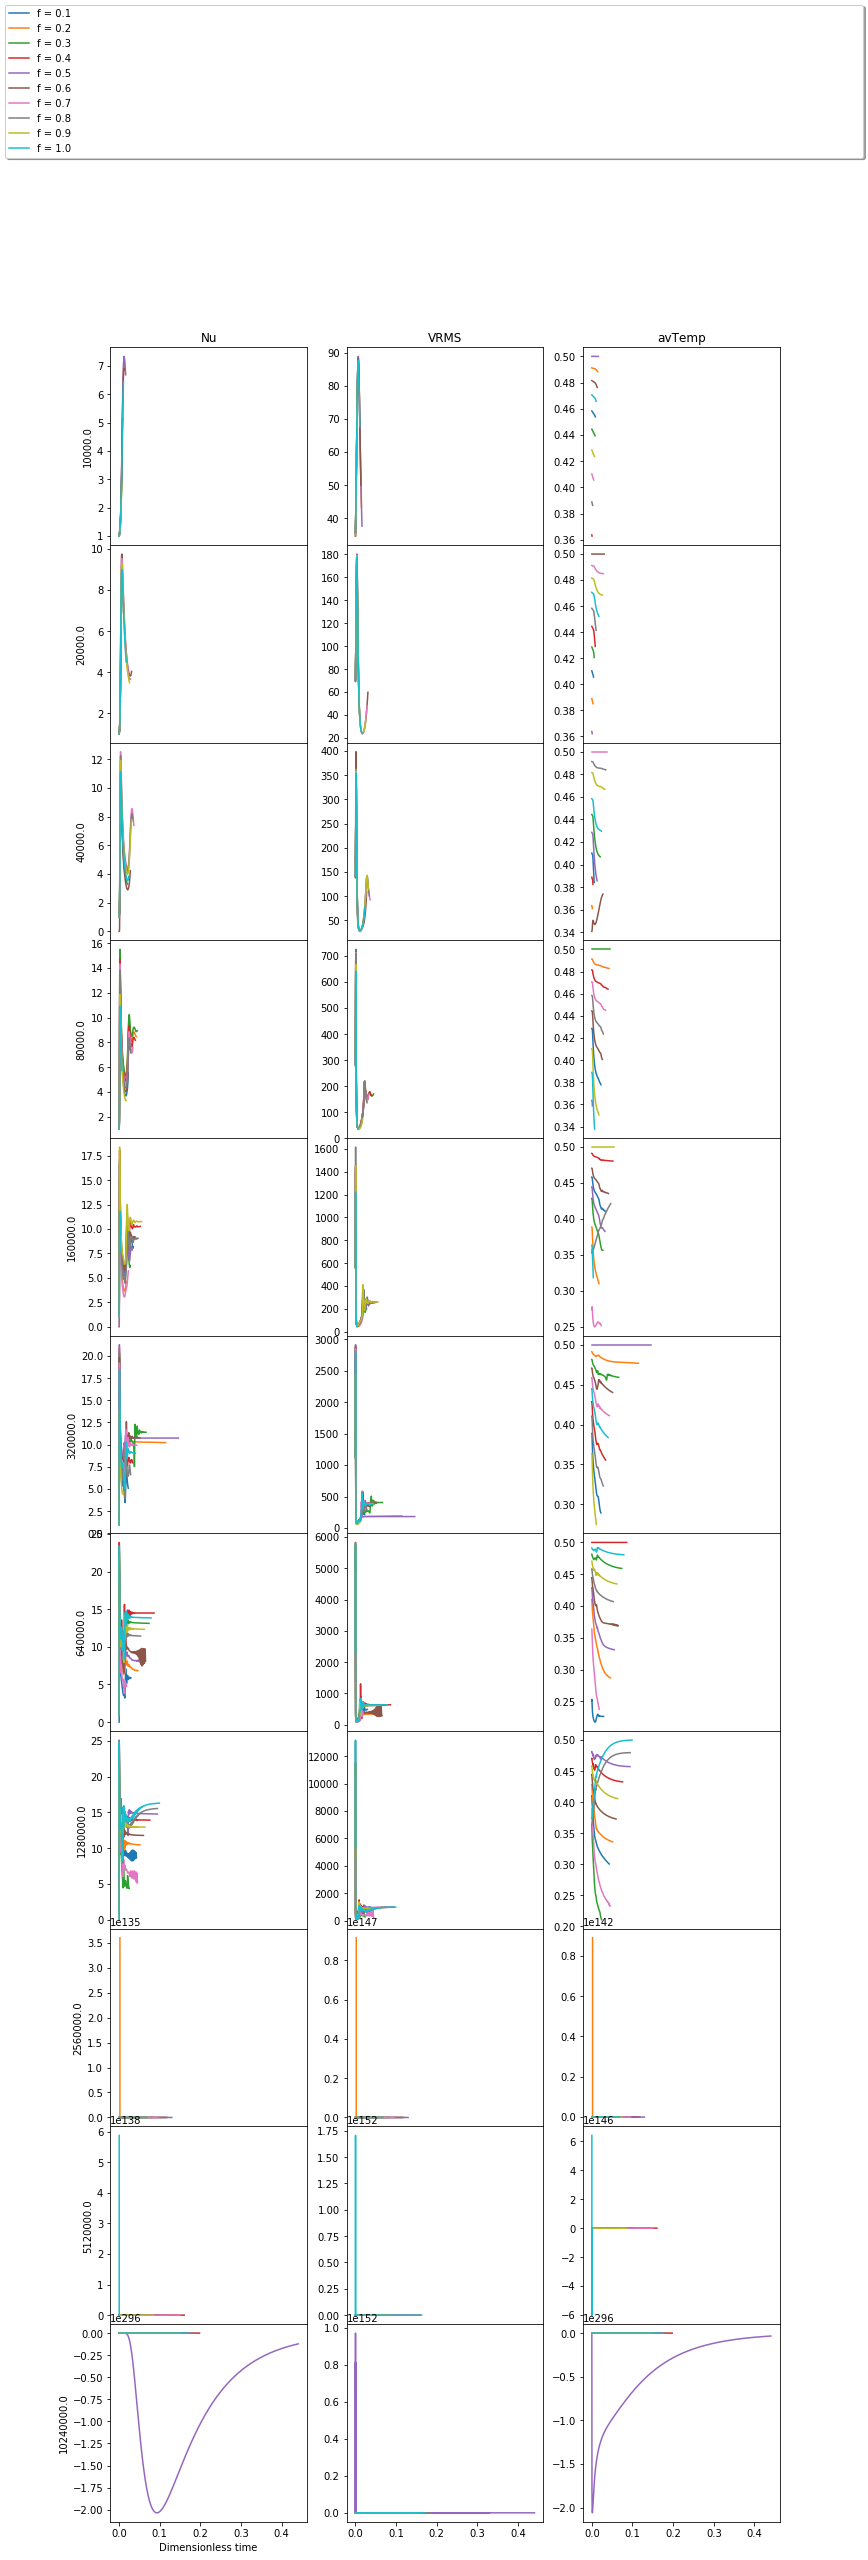

In [44]:
megaplot(*panderise(outputPath, 'res32'))

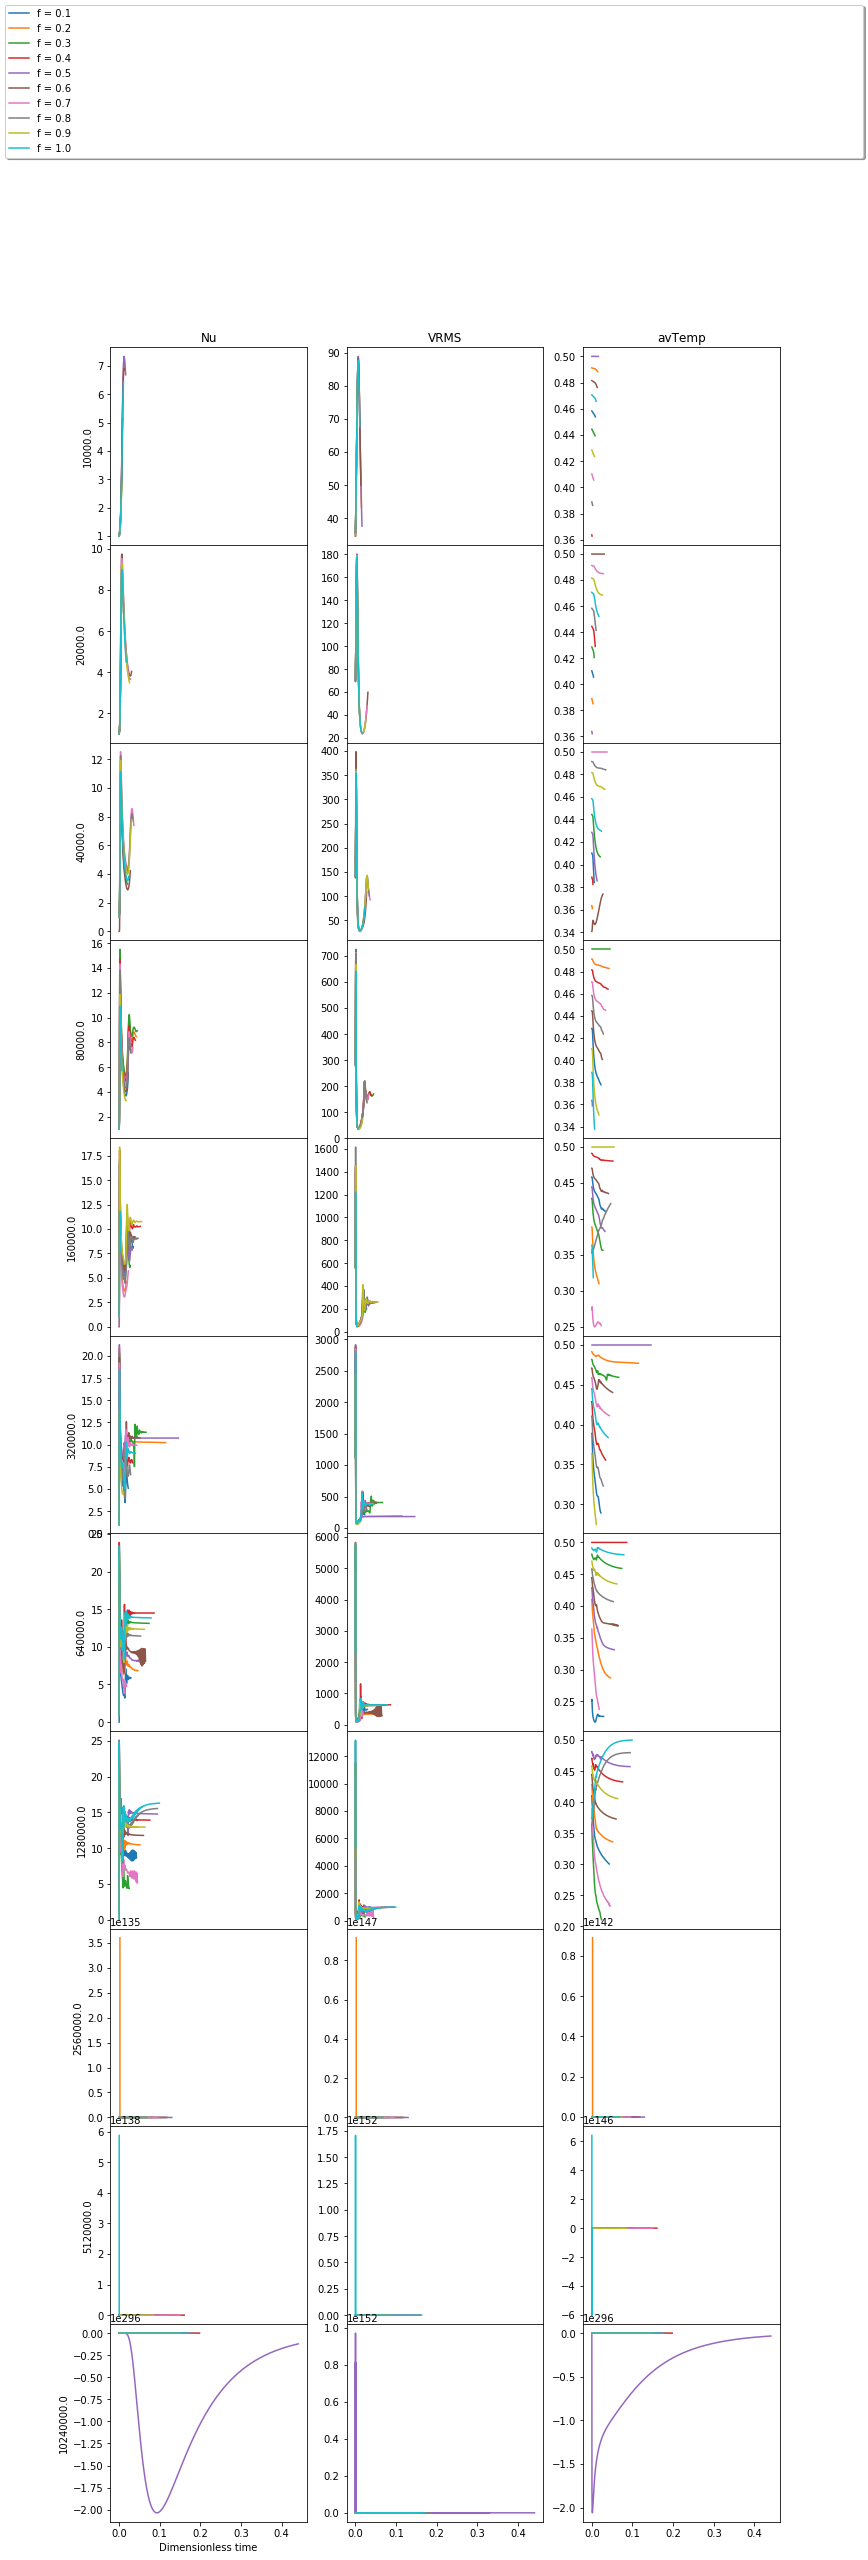

In [45]:
megaplot(*panderise(outputPath, 'res64'))

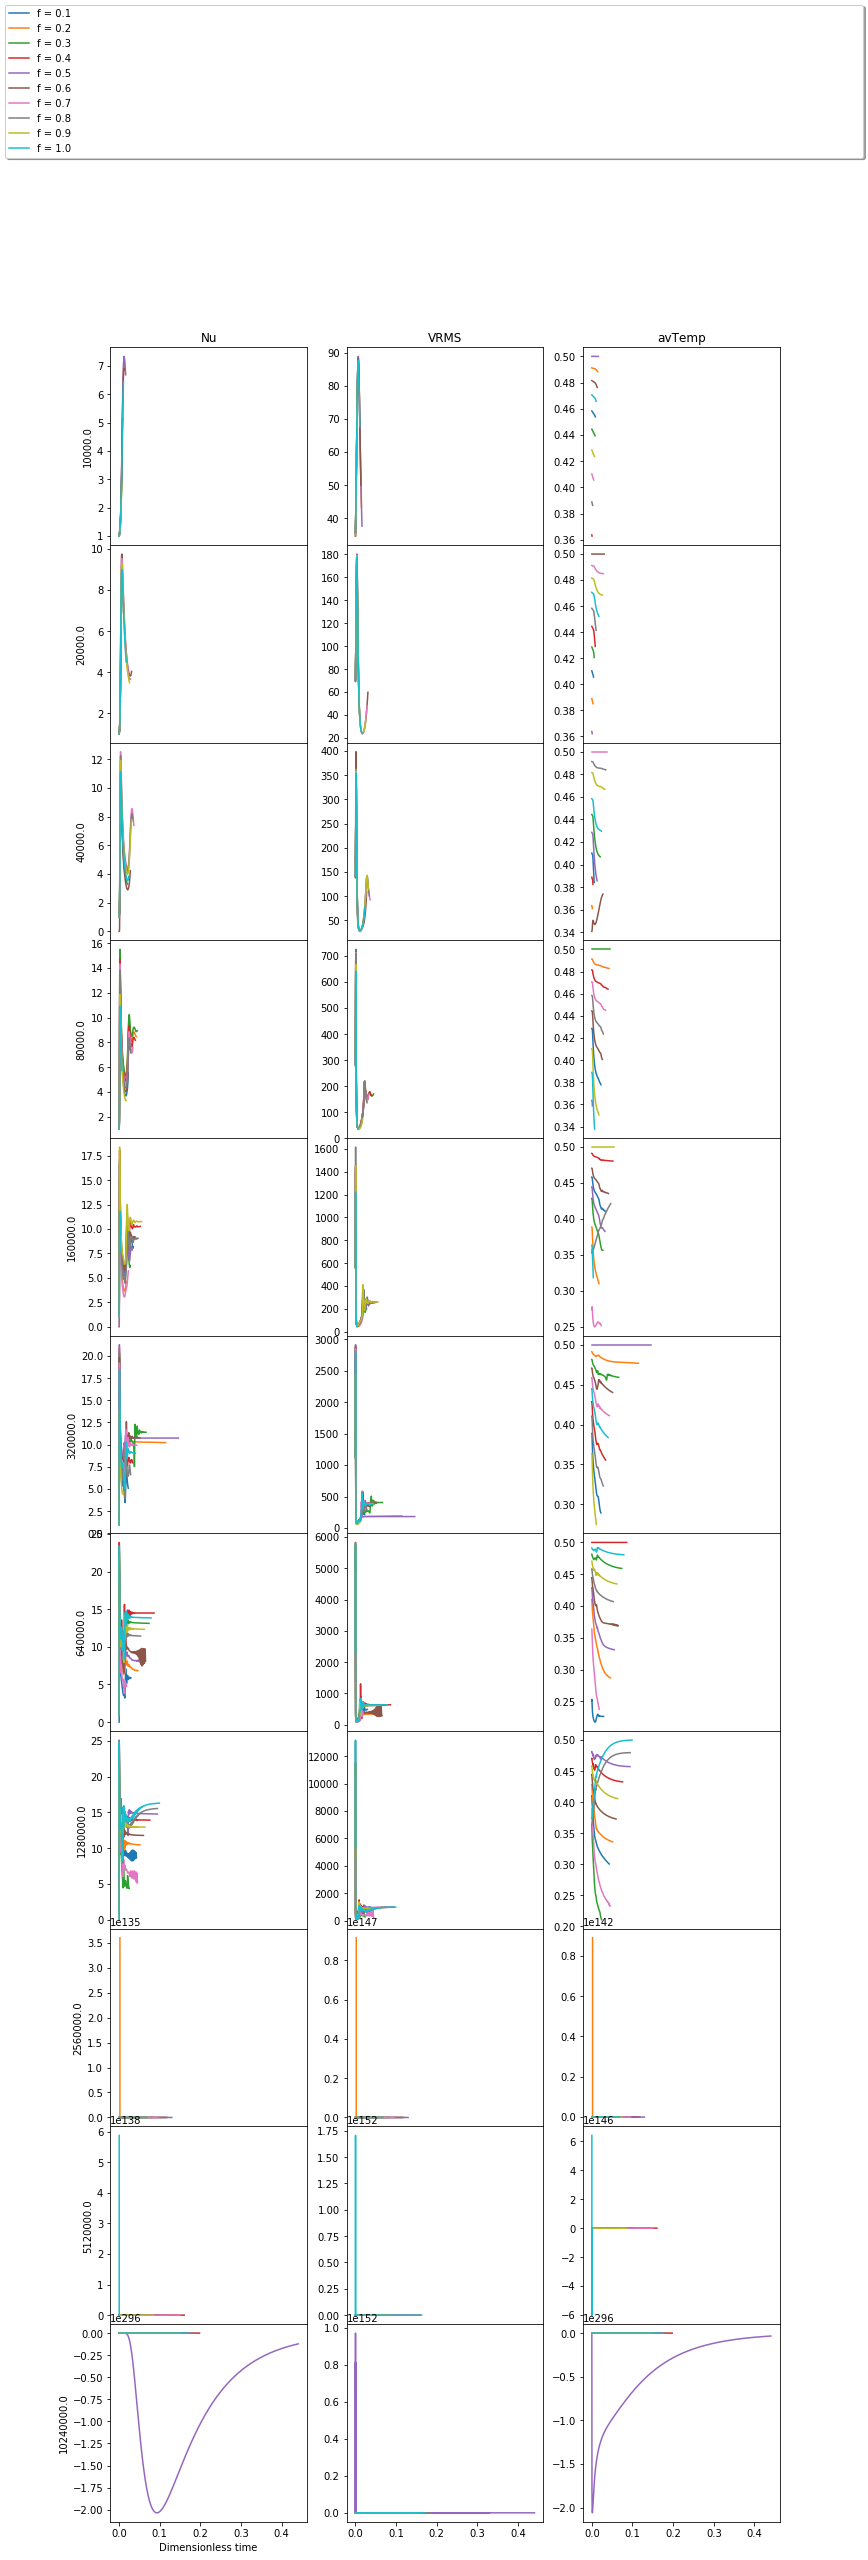

In [46]:
megaplot(*panderise(outputPath, 'res128'))